# Introduction to Customer Segmentation in Python

## Task 3: Principal Component Analysis
Let's go over some [PCA theory](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), and see how it works!

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [2]:
df=pd.read_csv("Data/data_processed.csv", index_col=0)

In [5]:
data=df[features].to_numpy()
data.shape  # we got 440 samples and 6 features for each. However we cannot visualize  dimensional space.

(440, 6)

In [6]:
# we will try to compress the  dimensional data down into 2 dimensional data using PCA.
# before dimensional reduction, we need to standardize the data to have "zero" mean and "1" standard deviation not to have bias in our data.

scaler=StandardScaler()
data=scaler.fit_transform(data)
data[:, 0].std() # we check result of the standardization

1.0

In [7]:
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [8]:
np.save("Data/training_data.npy", data)  # we saved the numpy array

In [9]:
pca=PCA(n_components=2)  #n_components=2 because we aimed to reduce dimensionality of data into 2.
res_pca=pca.fit_transform(data)

In [14]:
res_pca.shape

(440, 2)

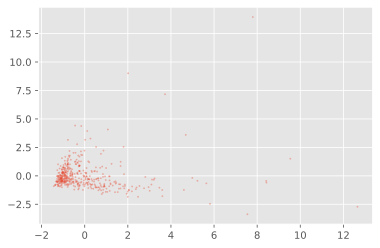

In [18]:
plt.scatter(res_pca[:, 0], res_pca[:, 1], s=2, alpha=0.3) # res_pca[:, 0] respresents first feature in the 2 dimensional data, and res_pca[:, 1] represents the second feature in the twodimensional data

# we will try to find customer clusters in the illustrated plot.

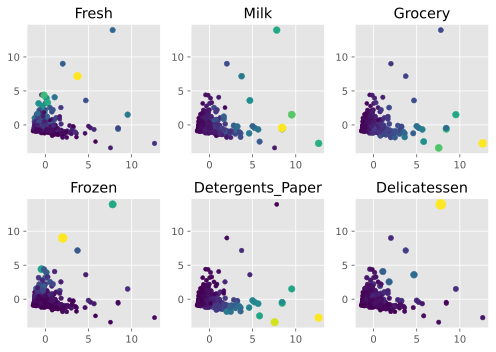

In [24]:
fig, axes=plt.subplots(2, 3, figsize=(7, 5)) # .subplots provides writing many graphs into one plot. 2 and 4 specify the number of the rows and columns in the fig plot respectively.


for feature, ax in zip(features, axes.ravel()):   # .subplots provides writing many graphs into one plot. 2 and 4 specify the number of the rows and columns in the fig plot respectively.
    cmap="viridis"     # color schema
    sizes=20+5*data[:, features.index(feature)] # magnitudes for bubles in the catter plot. The values of standardized data were to small, that is why we aggrigate 20 and multiply with 5 to have better plot size for bubbles.
    cols=df[feature]   # colors
    ax.scatter(res_pca[:, 0], res_pca[:, 1], s=sizes, c=cols, cmap=cmap)
    ax.set_title(feature)
plt.tight_layout()

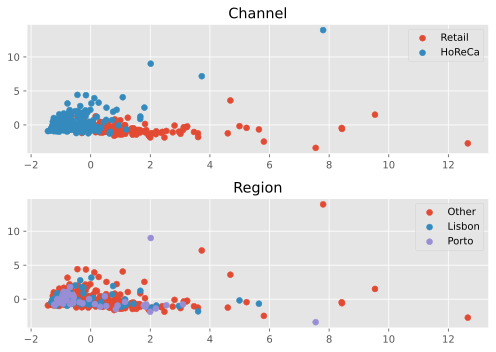

In [33]:
# we can also use following syntax to check categorical data in which we did not implement PCA

fig, axes=plt.subplots(2, 1, figsize=(7,5))

for feature, ax in zip(["Channel", "Region"], axes.ravel()):
    cmap="Pastell"
    sizes=20
    for unique_val in df[feature].unique():
        ax.scatter(
            res_pca[df[feature]==unique_val, 0], 
            res_pca[df[feature]==unique_val, 1],
            label=unique_val)
            
        ax.set_title(feature)
        ax.legend()
    plt.tight_layout()